## Social vulnerability and Covid-19 in Chile

0. A first look at the DataFrames
1. Covid-19 in Chile
    1. Covid-19 in Chile and worldwide
    2. Timeline of Covid-19 cases and deaths in Chile 
    3. Which are the 10 most affected districts in Chile, regarding cases and deaths
    
2. Analyze the CASEN data
    1. Social indicators for the ten most affected districts regarding Covid-19 cases

In [83]:
# Read in libraries
import pandas as pd
pd.options.mode.chained_assignment = None  

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Read in CASEN data about social vulnerability
casen = pd.read_stata('Casen 2017.dta', convert_categoricals = False)

# Read in data about Covid-19 cases and deaths in Chilean regions
cases_regions = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv',
    parse_dates = True)

deaths_regions = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv',
    parse_dates = True)

# Read in data about Covid-19 in Chilean districts
cases_districts = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv')
cases_districts = cases_districts[~cases_districts.Comuna.str.contains('Desconocido')]

deaths_districts = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv')
deaths_districts = deaths_districts[~deaths_districts.Comuna.str.contains('Desconocido')]
deaths_districts = deaths_districts[~deaths_districts.Comuna.str.contains('Total')]



# Read in data about Covid-19 worldwide
csse_cases_all = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

csse_all_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-27-2020.csv')

csse_deaths_all = pd.read_csv(
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [54]:
# Read in World Bank data about population
worldbank_population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1217749.csv', skiprows = range(3))
worldbank_population = worldbank_population.iloc[:, [0, 1, -2]]

# Unforunately, the World Bank country names are not in all cases the same as the CSSE country names. Therefore
# some renaming is necessary. 
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('United States', 'US')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Yemen, Rep.', 'Yemen')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Myanmar', 'Burma')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('St. Kitts and Nevis', 'Saint Kitts and Nevis')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Syrian Arab Republic', 'Syria')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Venezuela, RB', 'Venezuela')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Slovak Republic', 'Slovakia')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('St. Lucia', 'Saint Lucia')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Russian Federation', 'Russia')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Kyrgyz Republic', 'Kyrgyzstan')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Korea, Rep.', 'Korea, South')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Iran, Islamic Rep.', 'Iran')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Gambia, The', 'Gambia')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Egypt, Arab Rep.', 'Egypt')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Czech Republic', 'Czechia')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Congo, Dem. Rep.', 'Congo (Kinshasa)')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Congo, Rep.', 'Congo (Brazzaville)')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Brunei Darussalam', 'Brunei')
worldbank_population['Country Name'] = worldbank_population['Country Name'].replace('Bahamas, The', 'Bahamas')


In [36]:
# Select only 46 relevant indicators from the CASEN study, such as poverty, access to health institutions or
# number of persons in household. 

casen_columns = ['region', 'provincia', 'comuna', 'e1', 'e6a', 'o1', 'o12', 'o16', 'o25a_min',
                'o25c', 'o28', 'y21a', 'y22a', 'y24', 'y27a', 'ysub', 'ytot', 's12', 's13', 's14', 
                's26a', 's27a', 's28', 's31a1', 's32c', 's33g1', 's33i1', 's33j1',
                'r1a', 'r3', 'r7c', 'r8a', 'r8b', 'r16a', 'r16b', 'v33', 'v37a', 'v37c',
                'v37i', 'v39b', 'pobreza', 'hh_d_prevs', 'hh_d_cot', 'hh_d_servbas', 'qaut', 'numper']

casen_rel = casen[casen_columns]

In [37]:
def first_look(lst):
    """
    Provides useful information about a list of dataframes: Name, Shape, NaNs and describe().
    
    Input: 
        lst(List): List of DataFrames
    
    Output: 
        Prints name, shape, share of NaNs, describe()
    """
    for item in lst:
        def get_df_name(df):
            name =[x for x in globals() if globals()[x] is df][0]
            return name
        print('Information for DataFrame ' + get_df_name(item))
        print('The shape of this DataFrame is {}.'.format(item.shape))
        print('NaN share for each column:')
        print((np.sum(item.isna() == True))/item.shape[0])
        print('Describe() for each column:')
        print(item.describe())
        print('---')

In [38]:
def timeline_plot(df, title):
    """
    A function to plot a seaborn diagram which shows the development of Covid-19 data in Chile. 
    For better readability, the function returns a log scale plot. 
    
    Input: 
        df (DataFrame): A transposed DataFrame where the first row (not the index) is the date and the columns are the 
        regions. 
        title (string): Specify the kind of the plot (cases or deaths) 
        
    Output: 
        A seaborn plot. 
    """

    # Transform wide dataframe to long dataframe 
    df_melt = pd.melt(
        df, id_vars = 'Region', 
        value_vars = df.columns.drop('Region'),
        var_name='Regions', 
        value_name='Cases'
    )

    # Apply pandas to datetime and rename column for better understanding
    df_melt['Region'] = pd.to_datetime(df_melt['Region'], format = '%Y-%m-%d')
    df_melt = df_melt.rename(columns = {'Region': 'Date'}).sort_values('Cases', ascending = False)

    # Make a plot 
    f, ax = plt.subplots(figsize = (16, 10))
    g = sns.lineplot(
        df_melt.Date, 
        df_melt.Cases, 
        hue = df_melt.Regions
    )

    plt.xlabel('Date', fontsize = 12)
    plt.ylabel('{}'.format(title), fontsize = 12)
    plt.title('Covid-19 {} in Chile (log scale)'.format(title), fontsize = 12)
    
    plt.tick_params(labelsize=12)
    ax.yaxis.tick_right()
    ax.set_yscale('log')


    plt.grid(False)
    ax.yaxis.grid()
    sns.despine()
    plt.show()
            

In [60]:
def plot_covid_worldwide(df, title, country, m, z=100000, t=100000):
    """
    Function to plot a comparison between the m-most affected countries (as per z habitants) 
    and a specific country, which is highlighted in red. 
    
    If the specific country is not wihtin the m-most affected countries, it is appended at the end. 
    
    Input: 
        df (DataFrame): DataFrame with country data
        title (string): Specify the kind of the plot (cases or deaths) 
        country (string): The country that sould be highlighted
        m (int): Returns the m-most affected countries. 
        z (int): Number to calculate the cases per z habitants
        t (int): Number of minimal population for a country to be considered (standard: 100.000)
        
    Output: 
        A seaborn plot. 
    """
    
    # Get the relevant columns of df (Countryname and total number) and add a new column
    # of cases/deaths per z habitants. Rename the columns. 
    df_current = df.iloc[:, [1, -1]]
    df_current.columns = ['Country', title]

    # Merge World Bank population data with DataFrame
    df_final = df_current.merge(worldbank_population, left_on = 'Country', right_on = 'Country Name', how = 'left')
    df_final = df_final.drop(['Country Name', 'Country Code'], axis = 1)
    df_final.columns = ['Country', title, 'population']

    # Calculate cases per z habitants
    df_final.loc[:, 'per {} habitants'.format(z)] = (df_final.loc[:, title] / df_final.loc[:, 'population']) * z

    # Drop rows of countries that are below z
    rows_to_drop = []

    for i in range(len(df_final.population)):
        if df_final.population[i] < t:
            rows_to_drop.append(i)

    df_final = df_final.drop(rows_to_drop, axis = 0)


    # Groupby country and get the m-most affected countries. 
    df_final = df_final.groupby(
        'Country')[
        'per {} habitants'.format(z)].sum().reset_index().sort_values([
        'per {} habitants'.format(z)], ascending = False)
    
    # Show only the top m countries
    df_final_head = df_final.head(m)

    # Check if specific country is part of the m-most affected countries
    if country in list(df_final_head.Country) == True:

        # Get index of specific country in country list
        index = list(df_final_head.Country).index(country)

        # Plot the figure
        f = plt.figure(figsize = (16, 10))
        ax = f.add_subplot(1,1,1)

        ax = sns.barplot(y = df_final_head['Country'], x = df_final_head['per 100.000'], color = 'darkgrey')
        plt.ylabel('Country', fontsize = 12)
        plt.xlabel('{} per {} habitants'.format(title, z), fontsize = 12)
        plt.title('Covid-19 {} per {} habitants worldwide'.format(title, z), fontsize = 12)
        ax.get_children()[index].set_color('darkred') 

        plt.tick_params(labelsize=12)

        plt.grid(False)
        ax.xaxis.grid()
        sns.despine()
        plt.show()


    # If the specific country is not within the m-most affected countries, append it to the list
    else:

        df_final_head = df_final_head.append(df_final[df_final['Country'] == country])
        index = list(df_final_head.Country).index(country)

        f = plt.figure(figsize = (16, 10))
        ax = f.add_subplot(1,1,1)

        ax = sns.barplot(y = df_final_head['Country'], x = df_final_head['per {} habitants'.format(z)], color = 'darkgrey')
        plt.ylabel('Country', fontsize = 12)
        plt.xlabel('{} per {} habitants'.format(title, z), fontsize = 12)
        plt.title('Covid-19 {} per {} habitants worldwide'.format(title, z), fontsize = 12)
        ax.get_children()[index].set_color('darkred') 

        plt.tick_params(labelsize=12)

        plt.grid(False)
        ax.xaxis.grid()
        sns.despine()
        plt.show()

In [40]:
def get_most_affected_districts(df, title, m):
    """
    Function to get the most affected districts.
    
    Input: 
        df (DataFrame): DataFrame with information about districts and numbers of cases/deaths
        title (string): Specify the kind of the data (cases or deaths)
        m (int): Returns the m-most affected districts.
        
    Output:
        most_affected (DataFrame): DataFrame with the m-most affected districts
    """

    # Get the relevant columns from dataframe and rename them
    df_relevant = df.iloc[:, [0, 2, 3, -2]]
    df_relevant.columns = ['Region', 'District', 'District ID', title]
    
    # Group by District and drop "index" column
    most_affected = df_relevant.groupby(
        'District').agg({
        'Region': 'max',
        'District ID': 'max',
        title: 'sum'}).reset_index().sort_values(
        title, ascending = False).head(10).reset_index()
    
    most_affected = most_affected.drop(['index'], axis = 1)  
    
    return most_affected

## 0. A first look at the DataFrames

A first look at the DataFrames shows that the CASEN data has a lot of NaNs. E.g. the variable s32c ('Do you have difficulties with moving within your house?') has a very high percentage of NaNs. Other possible variables (option 2 and 3 for 'permament conditions'), that I found interesting at first, had more than 97% of NaNs which is why I dropped them.  

Interestingly, other indicators that are about not having enough money to buy food or having a water heater at home have the same share of NaNs, which is 67%. 

In [41]:
df_list = [casen_rel, cases_regions, deaths_regions, cases_districts, deaths_districts, csse_cases_all, csse_deaths_all]

first_look(df_list)

Information for DataFrame casen_rel
The shape of this DataFrame is (216439, 46).
NaN share for each column:
region          0.000000
provincia       0.000000
comuna          0.000000
e1              0.191107
e6a             0.000000
o1              0.191107
o12             0.573011
o16             0.682913
o25a_min        0.573011
o25c            0.625299
o28             0.191107
y21a            0.615448
y22a            0.000000
y24             0.672203
y27a            0.191107
ysub            0.712524
ytot            0.331424
s12             0.000000
s13             0.000000
s14             0.615448
s26a            0.000000
s27a            0.000000
s28             0.000000
s31a1           0.000000
s32c            0.881713
s33g1           0.191107
s33i1           0.191107
s33j1           0.191107
r1a             0.000000
r3              0.000000
r7c             0.672203
r8a             0.672203
r8b             0.672203
r16a            0.672203
r16b            0.672203
v33             0

       Codigo region  Codigo comuna      Poblacion  2020-03-30  2020-04-01  \
count     346.000000     346.000000     346.000000  343.000000  346.000000   
mean        8.797688    9034.997110   56237.890173    5.647230    8.141618   
std         3.847016    3818.147431   88945.967089   19.022787   25.224560   
min         1.000000    1101.000000     137.000000    0.000000    0.000000   
25%         6.000000    6109.250000    9649.250000    0.000000    0.000000   
50%         8.000000    8313.500000   19770.000000    0.000000    0.000000   
75%        13.000000   13102.750000   55441.250000    0.000000    5.000000   
max        16.000000   16305.000000  645909.000000  181.000000  225.000000   

       2020-04-03  2020-04-06  2020-04-08  2020-04-10  2020-04-13  ...  \
count   346.00000  346.000000  346.000000  346.000000  346.000000  ...   
mean     10.15896   13.254335   15.300578   18.138728   21.621387  ...   
std      31.03781   38.455380   42.803249   49.523508   56.388132  ...   
m

              Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    0.063910    0.067669    0.097744    0.157895   
std     24.904600   70.191330    1.042337    1.043908    1.473615    2.453621   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...        7/20/20  \
count  266.000000  266.000000  266.000000  266.000000  ...     266.000000   
mean     0.210526    0.308271    0.492481    0.500000  ...    2294.492481   
std      3.189730    4.660845    7.6642

## 1. Covid-19 in Chile

###     A. Covid-19 in Chile and worldwide

First, lets have a look at the spread of Covid-19 in Chile and worldwide. Therefore, we compare the number of cases and deaths per 100.000 habitants. 

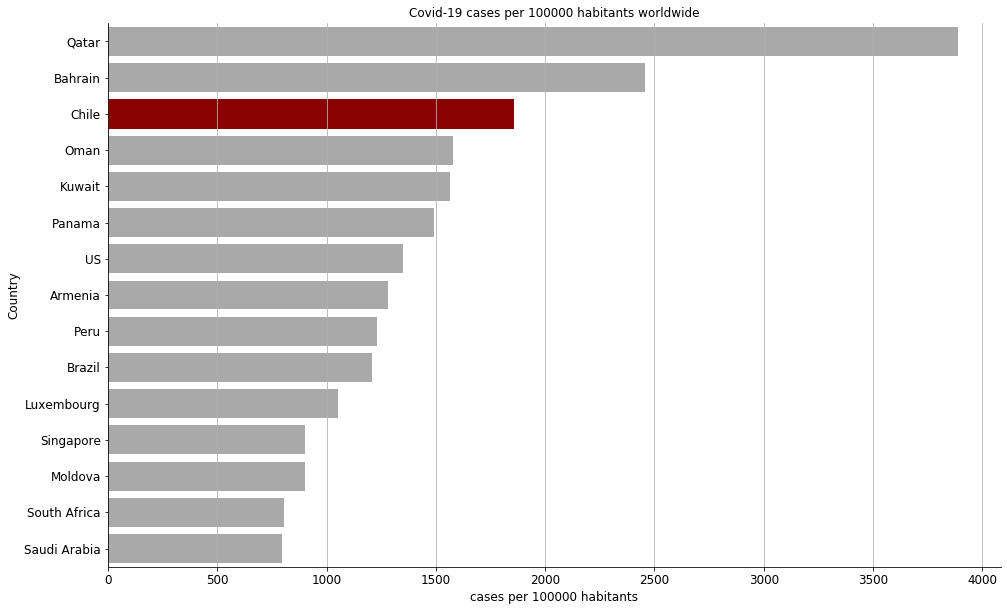

In [64]:
plot_covid_worldwide(csse_cases_all, 'cases', 'Chile', 15, 100000, 100000)

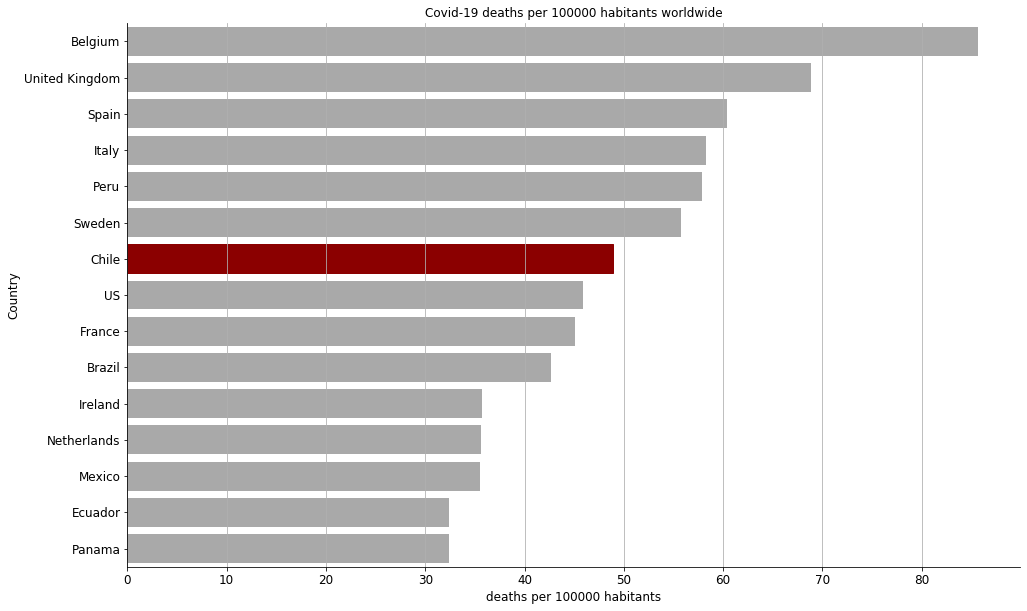

In [65]:
plot_covid_worldwide(csse_deaths_all, 'deaths', 'Chile', 15, 100000, 100000)

### B. Timeline of Covid-19 cases and deaths in Chile 

Next, we will focus on the situation in Chile. Chile is separated into 16 different regions, where "Metropolitana" is the region where the capital Santiago de Chile is located. It becomes clear that the Metropolitan Region is by far most affected by Covid-19.

However, other regions, just like Valparaíso (close to Santiago) and Antofagasta (in the north) experienced a very high rise in cases and deaths. 

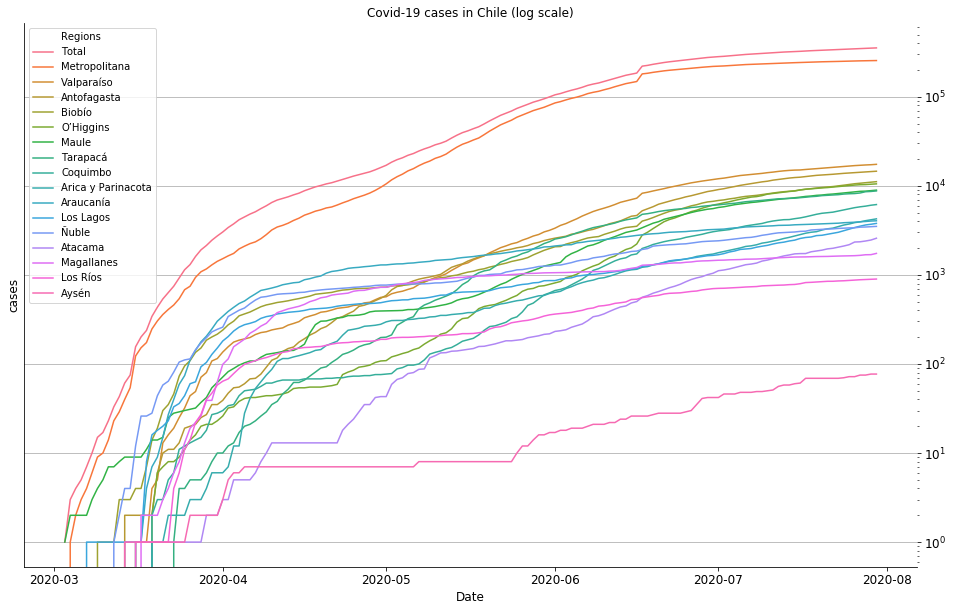

In [44]:
timeline_plot(cases_regions, 'cases')

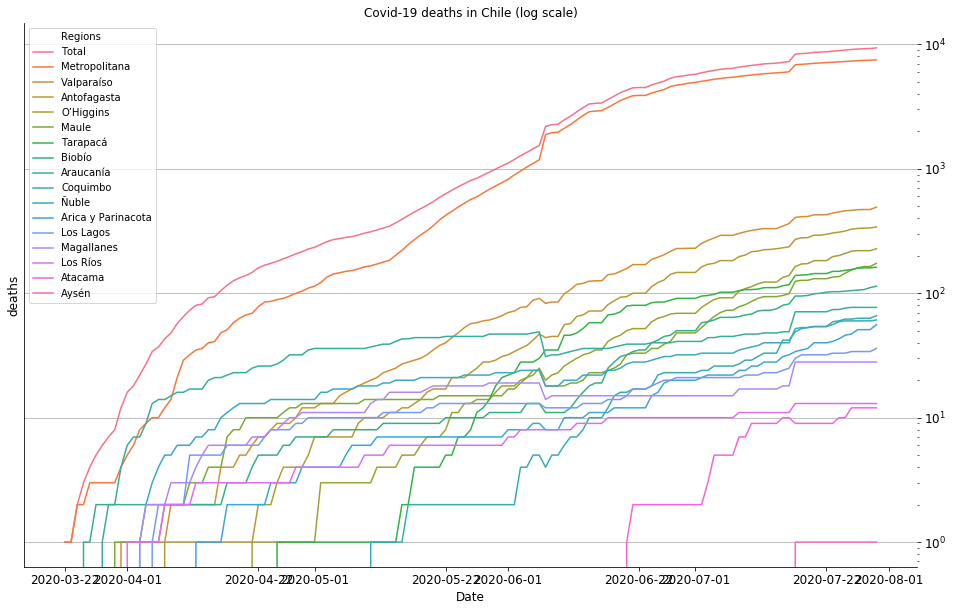

In [45]:
timeline_plot(deaths_regions, 'deaths')

###     B. Which are the 10 most affected districts in Chile, regarding cases and deaths

Looking at the most affected districts in Chile, it is no surprise that they are mainly located in the capital metropolitan zone. 

In [46]:
get_most_affected_districts(cases_districts, 'cases', 10)

District         Region  District ID    cases
0   Puente Alto  Metropolitana      13201.0  22105.0
1      Santiago  Metropolitana      13101.0  14463.0
2         Maipu  Metropolitana      13119.0  13960.0
3    La Florida  Metropolitana      13110.0  13156.0
4     Penalolen  Metropolitana      13122.0  11384.0
5  San Bernardo  Metropolitana      13401.0  10679.0
6    La Pintana  Metropolitana      13112.0   9791.0
7      Pudahuel  Metropolitana      13124.0   9415.0
8     Quilicura  Metropolitana      13125.0   8729.0
9      Recoleta  Metropolitana      13127.0   8205.0

In [47]:
get_most_affected_districts(deaths_districts, 'deaths', 10)

District         Region  District ID  deaths
0   Puente Alto  Metropolitana      13201.0   508.0
1    La Florida  Metropolitana      13110.0   427.0
2         Maipu  Metropolitana      13119.0   334.0
3  San Bernardo  Metropolitana      13401.0   300.0
4      Recoleta  Metropolitana      13127.0   288.0
5    La Pintana  Metropolitana      13112.0   286.0
6     Penalolen  Metropolitana      13122.0   286.0
7    Las Condes  Metropolitana      13114.0   265.0
8      Santiago  Metropolitana      13101.0   262.0
9         Nunoa  Metropolitana      13120.0   226.0

## 2. Analyze the CASEN data
### A. Social indicators for the ten most affected districts regarding Covid-19 cases and deaths

In a next step, we are going to analyze the correlation between the CASEN data about social vulnerability and Covid-19 cases and deaths in the most affected districts in Chile. 

In [92]:
def show_CASEN_for_districts(df, title, m): 
    """
    A function to merge a DataFrame with the CASEN data and return an DataFrame with the mean of 
    the different CASEN indicators and the m most affected districts. 
    
    Input: 
        df (DataFrame): DataFrame to provide data about the affected districts
        title (string): Type of the above mentioned DataFrame (cases or deaths)
        m (int): Number of how many affected districts you would like to have returned. 
        
    Output: 
        
    """

    # Store 10 most affected districts (cases) in list: 
    top_districts = get_most_affected_districts(df, title, m)
    districts_list = list(top_districts['District ID'])

    # Filter casen_rel DataFrame so it contains only the 10 most affected districts: 
    casen_district = casen_rel[casen_rel.comuna.isin(districts_list) == True]

    # Return mean value for each indicator
    casen_district_grouped = casen_district.groupby(['comuna'])[[i for i in casen_district.columns[3:]]].mean().reset_index()

    # Merge with data about most affected districts, drop District ID column and sort by cases or deaths
    casen_district_grouped = casen_district_grouped.merge(top_districts, left_on = 'comuna', right_on = 'District ID', how = 'left')
    casen_district_grouped = casen_district_grouped.drop(['District ID'], axis = 1).sort_values(title, ascending = False)
    
    return casen_district_grouped


In [95]:
show_CASEN_for_districts(cases_districts, 'cases', 10)

comuna        e1        e6a        o1       o12       o16   o25a_min  \
8   13201  1.038925   9.412603  1.423246  1.513926  1.247863  17.544474   
0   13101  1.031286  11.087912  1.298635  1.268716  1.222744  19.832151   
3   13119  1.040534   9.713341  1.455412  1.262719  1.168317  18.160967   
1   13110  1.088595   9.823140  1.442464  1.546889  1.224256  17.694128   
4   13122  1.074513   9.583676  1.431837  1.442693  1.233397  18.180516   
9   13401  1.080131   8.694073  1.469338  1.473607  1.255725  17.697947   
2   13112  1.147757   8.107287  1.480211  1.874396  1.366300  15.567633   
5   13124  1.086667   9.209626  1.426667  1.358407  1.201220  15.743363   
6   13125  1.033486   8.596450  1.415525  1.161954  1.184300  16.434447   
7   13127  1.107143   9.139140  1.476648  1.249370  1.167785  15.891688   

       o25c       o28      y21a  ...      v39b   pobreza  hh_d_prevs  \
8  1.553936  1.400219  4.898007  ...  1.914976  2.899827    0.071893   
0  1.845106  1.465870  4.972782  ...  2.137602  2.929220    0.112669   
3  1.563603  1.619456  4.894624  ...  1.515364  2.966161    0.092960   
1  1.564752  1.441446  4.891429  ...  1.548347  2.941322    0.080579   
4  1.613105  1.536833  4.575472  ...  1.696845  2.943681    0.083276   
9  1.650696  1.372036  4.797639  ...  2.152964  2.878904    0.059730   
2  1.518717  1.455145  4.679525  ...  2.474696  2.802632    0.049595   
5  1.526185  1.580000  4.860465  ...  1.914439  2.887701    0.096257   
6  1.758904  1.321157  4.858065  ...  2.074556  2.904142    0.049704   
7  1.755747  1.245879  4.924581  ...  1.816742  2.918552    0.097285   

   hh_d_cot  hh_d_servbas      qaut    numper      District         Region  \
8  0.397575      0.009499  2.971071  4.036269   Puente Alto  Metropolitana   
0  0.262295      0.028694  3.781444  3.078431      Santiago  Metropolitana   
3  0.369976      0.007779  3.122131  3.963827         Maipu  Metropolitana   
1  0.386097      0.014876  3.189256  4.136364    La Florida  Metropolitana   
4  0.431512      0.029533  3.257555  4.354396     Penalolen  Metropolitana   
9  0.358009      0.036966  2.625876  4.408540  San Bernardo  Metropolitana   
2  0.504082      0.016194  2.305668  4.263158    La Pintana  Metropolitana   
5  0.412214      0.007487  2.925134  4.150802      Pudahuel  Metropolitana   
6  0.259172      0.035503  3.036686  3.970414     Quilicura  Metropolitana   
7  0.328409      0.031674  2.955882  3.520362      Recoleta  Metropolitana   

     cases  
8  22105.0  
0  14463.0  
3  13960.0  
1  13156.0  
4  11384.0  
9  10679.0  
2   9791.0  
5   9415.0  
6   8729.0  
7   8205.0  

[10 rows x 47 columns]

In [94]:
show_CASEN_for_districts(deaths_districts, 'deaths', 10)

comuna        e1        e6a        o1       o12       o16   o25a_min  \
8   13201  1.038925   9.412603  1.423246  1.513926  1.247863  17.544474   
1   13110  1.088595   9.823140  1.442464  1.546889  1.224256  17.694128   
4   13119  1.040534   9.713341  1.455412  1.262719  1.168317  18.160967   
9   13401  1.080131   8.694073  1.469338  1.473607  1.255725  17.697947   
7   13127  1.107143   9.139140  1.476648  1.249370  1.167785  15.891688   
2   13112  1.147757   8.107287  1.480211  1.874396  1.366300  15.567633   
6   13122  1.074513   9.583676  1.431837  1.442693  1.233397  18.180516   
3   13114  1.023915  12.064947  1.426029  1.222120  1.154545  18.756682   
0   13101  1.031286  11.087912  1.298635  1.268716  1.222744  19.832151   
5   13120  1.022302  11.523667  1.378417  1.398004  1.222714  20.225055   

       o25c       o28      y21a  ...      v39b   pobreza  hh_d_prevs  \
8  1.553936  1.400219  4.898007  ...  1.914976  2.899827    0.071893   
1  1.564752  1.441446  4.891429  ...  1.548347  2.941322    0.080579   
4  1.563603  1.619456  4.894624  ...  1.515364  2.966161    0.092960   
9  1.650696  1.372036  4.797639  ...  2.152964  2.878904    0.059730   
7  1.755747  1.245879  4.924581  ...  1.816742  2.918552    0.097285   
2  1.518717  1.455145  4.679525  ...  2.474696  2.802632    0.049595   
6  1.613105  1.536833  4.575472  ...  1.696845  2.943681    0.083276   
3  1.868308  1.516129  5.114548  ...  1.715339  2.996248    0.023932   
0  1.845106  1.465870  4.972782  ...  2.137602  2.929220    0.112669   
5  1.792079  1.373381  5.173611  ...  1.925704  2.981982    0.058965   

   hh_d_cot  hh_d_servbas      qaut    numper      District         Region  \
8  0.397575      0.009499  2.971071  4.036269   Puente Alto  Metropolitana   
1  0.386097      0.014876  3.189256  4.136364    La Florida  Metropolitana   
4  0.369976      0.007779  3.122131  3.963827         Maipu  Metropolitana   
9  0.358009      0.036966  2.625876  4.408540  San Bernardo  Metropolitana   
7  0.328409      0.031674  2.955882  3.520362      Recoleta  Metropolitana   
2  0.504082      0.016194  2.305668  4.263158    La Pintana  Metropolitana   
6  0.431512      0.029533  3.257555  4.354396     Penalolen  Metropolitana   
3  0.199525      0.020686  4.492495  3.594747    Las Condes  Metropolitana   
0  0.262295      0.028694  3.781444  3.078431      Santiago  Metropolitana   
5  0.266066      0.004805  4.175976  3.312312         Nunoa  Metropolitana   

   deaths  
8   508.0  
1   427.0  
4   334.0  
9   300.0  
7   288.0  
2   286.0  
6   286.0  
3   265.0  
0   262.0  
5   226.0  

[10 rows x 47 columns]

In [75]:
casen_district_cases_grouped.loc[:, 'cases'] = casen_district_cases_grouped.loc['comuna' == cases_districts['District ID']]

casen_district_cases_grouped

C:\Users\Maximilian\Miniconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


comuna       e1       e6a        o1       o12      o16  o25a_min      o25c  \
0    8205  1.16958  8.613734  1.550699  1.702703  1.43318  13.72973  2.444444   

        o28      y21a  ...    v37c      v37i      v39b   pobreza  hh_d_prevs  \
0  1.496503  4.256705  ...  1.1402  1.437768  1.260372  2.855508    0.020029   

   hh_d_cot  hh_d_servbas      qaut    numper  cases  
0  0.240343      0.035765  2.247496  3.795422    NaN  

[1 rows x 45 columns]

In [ ]:
cases_districts

In [4]:
df.groupby('region').hogar.count().reset_index()#.sort_values('hogar', ascending = False)


region  hogar
0        1  10150
1        2   8510
2        3   6961
3        4   9952
4        5  19625
5        6  15862
6        7  15208
7        8  21532
8        9  15481
9       10  12442
10      11   5045
11      12   6637
12      13  42601
13      14  10175
14      15   7888
15      16   8370

In [18]:
df_e1 = df.loc[:, ['region', 'comuna', 'ytot']]

df_e1.groupby('comuna').ytot.mean().reset_index().sort_values('ytot', ascending = False)

comuna          ytot
267   13132  1.987719e+06
249   13114  1.618252e+06
258   13123  1.476416e+06
255   13120  1.081854e+06
248   13113  1.002380e+06
..      ...           ...
198    9208  1.857542e+05
165    8310  1.854193e+05
163    8308  1.828309e+05
119    7203  1.820784e+05
188    9119  1.580161e+05

[324 rows x 2 columns]